In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='whNgRKLxoYuprIFRey9ghFPfb9ty655tbhDAxvKtFQRP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'croprecommendation-donotdelete-pr-cv0cfzurzi6tj9'
object_key = 'Crop_recommendation.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [6]:
df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,NaN,NaN


In [7]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [8]:
df=df.drop(['Unnamed: 8','Unnamed: 9'], axis=1)

In [9]:
df.shape

(2200, 8)

In [10]:
df.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
phosphorus,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [13]:
corr=df.corr()
corr

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

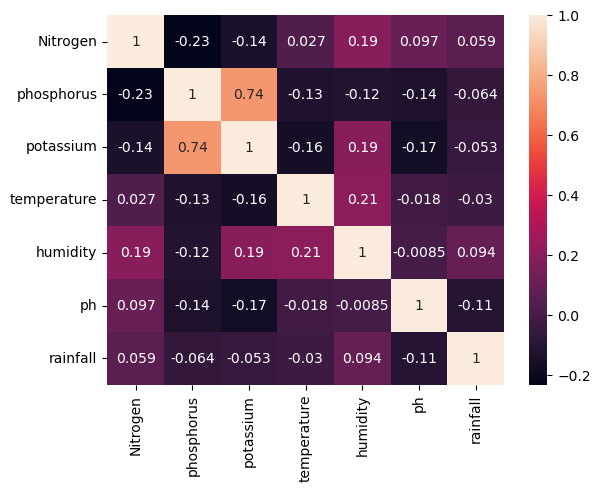

In [14]:
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='phosphorus', ylabel='potassium'>

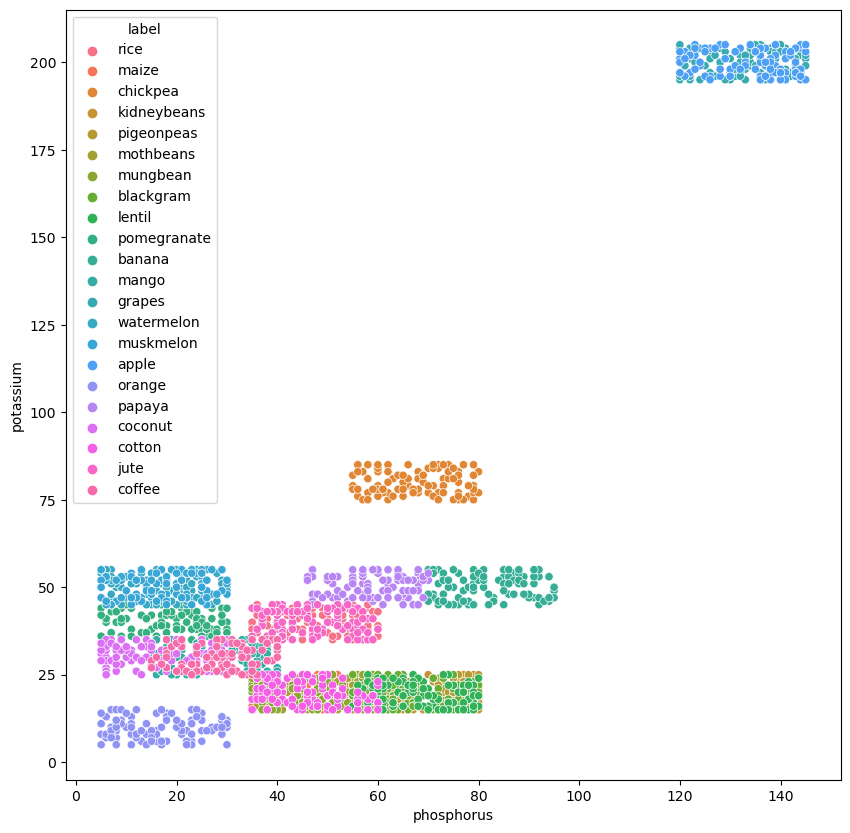

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='phosphorus', y='potassium',hue='label', data=df)

In [16]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

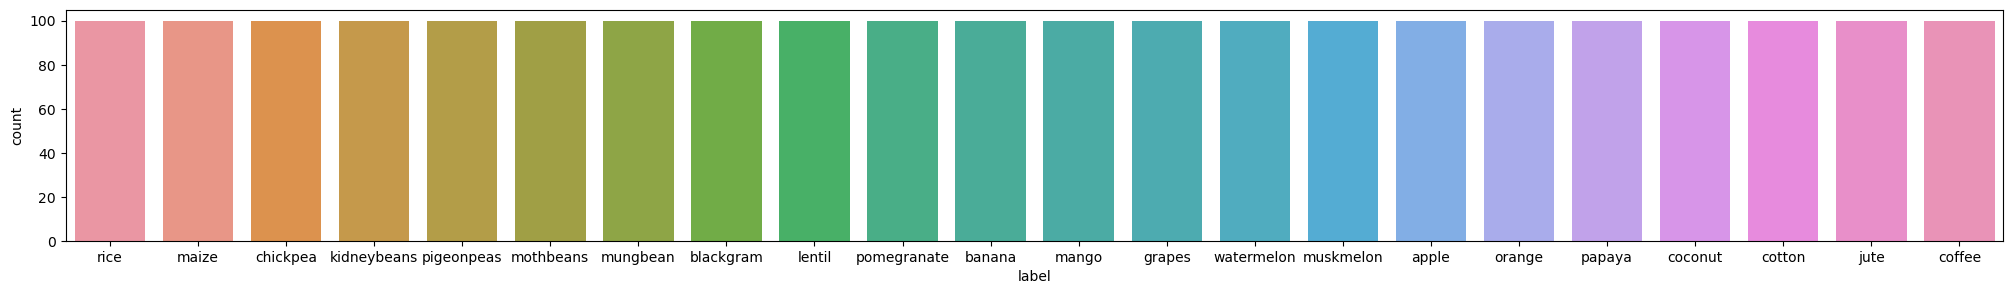

In [17]:
plt.figure(figsize=(25,3))
sns.countplot(x='label', data=df)

<AxesSubplot:xlabel='rainfall', ylabel='label'>

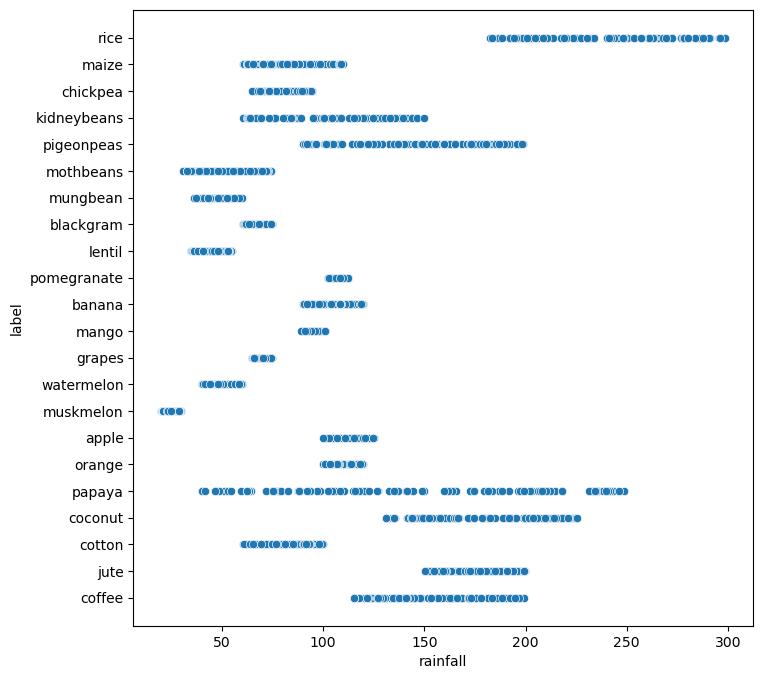

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='rainfall', y='label', data=df)




<Figure size 800x800 with 0 Axes>

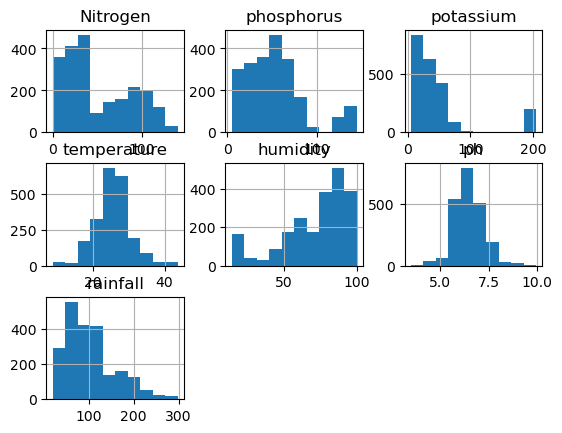

In [19]:
plt.figure(figsize=(8,8))
df.hist()
plt.show()

In [20]:
label_encoder=preprocessing.LabelEncoder()

In [21]:
df['label'] = pd.Categorical(df['label'])
dfDummiess = pd.get_dummies(df['label'], prefix = 'label')
dfDummiess

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df = pd.concat([df,dfDummiess], axis=1)
df = df.drop(["label"], axis = 1)

In [23]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
x=df.iloc[:,0:9].values
y=df.iloc[:,9].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.15 , random_state=43)

In [26]:
model=RandomForestClassifier(random_state=0)

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
y_pred=model.predict(x_test)

In [29]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[313   1]
 [  0  16]]


In [30]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.996969696969697


<AxesSubplot:>

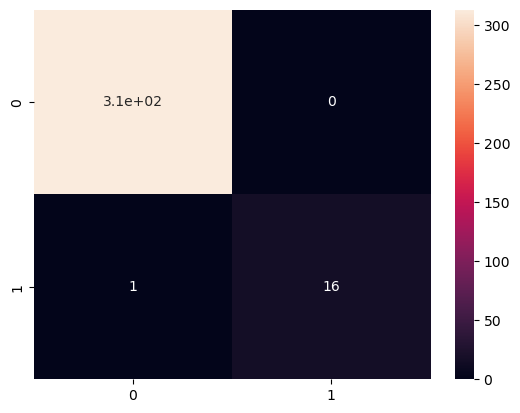

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      0.94      0.97        17

    accuracy                           1.00       330
   macro avg       1.00      0.97      0.98       330
weighted avg       1.00      1.00      1.00       330



In [33]:
ex=ExtraTreesClassifier()

In [34]:
ex.fit(x_train, y_train)

ExtraTreesClassifier()

In [35]:
y_pred=ex.predict(x_test)

In [36]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[313   1]
 [  0  16]]


<AxesSubplot:>

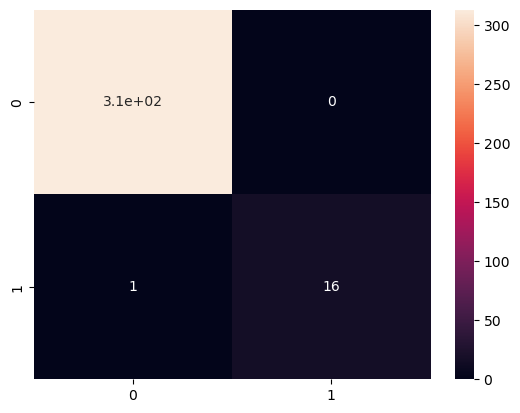

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [38]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.996969696969697


In [39]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       0.94      1.00      0.97        16

    accuracy                           1.00       330
   macro avg       0.97      1.00      0.98       330
weighted avg       1.00      1.00      1.00       330



In [40]:
knn=KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred=knn.predict(x_test)

In [43]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[313   0]
 [  0  17]]


<AxesSubplot:>

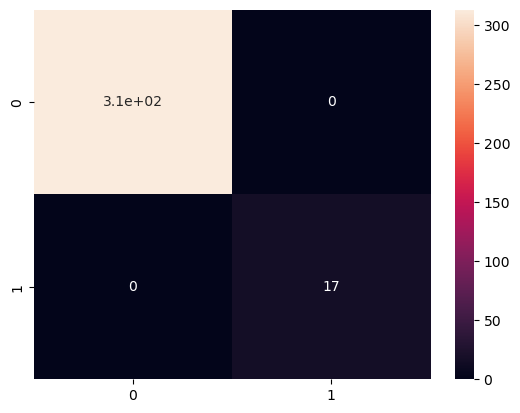

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [45]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [46]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        17

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [47]:
#deployment
import pickle

In [48]:
pickle.dump(rf, open('model.pkl','wb'))

NameError: name 'rf' is not defined

In [49]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.3 MB/s eta 0:00:0000:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.326
    Uninstalling ibm-watson-machine-learning-1.0.326:
      Successfully uninstalled ibm-watson-machine-learning-1.0.326


In [50]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [52]:
wml_credentials = {
    "apikey":"70tyE77Wr1qzhDVOEdwBYWS9qLCNqlx5t0KaJOolCgx5",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [55]:
wml_client = APIClient(wml_credentials)

In [56]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
46e46333-79a6-4fc6-b7bc-01b4efc23ec2  CROP_PRED_DEPLOY         2023-10-08T15:53:07.057Z
8099dca0-443d-4f47-899e-e2f39927f88a  churn_pred1              2023-09-05T10:32:12.616Z
566eeb35-11c9-438e-b71f-cd9ffd7ca207  PLACEMENT_PREDICTOR_IBM  2023-09-03T09:42:25.692Z
52a4953e-0fc8-415c-8509-0add7a1170ed  IBM_HC_DEPLOY            2023-09-02T06:37:47.281Z
------------------------------------  -----------------------  ------------------------


,ID,NAME,CREATED
0,46e46333-79a6-4fc6-b7bc-01b4efc23ec2,CROP_PRED_DEPLOY,2023-10-08T15:53:07.057Z
1,8099dca0-443d-4f47-899e-e2f39927f88a,churn_pred1,2023-09-05T10:32:12.616Z
2,566eeb35-11c9-438e-b71f-cd9ffd7ca207,PLACEMENT_PREDICTOR_IBM,2023-09-03T09:42:25.692Z
3,52a4953e-0fc8-415c-8509-0add7a1170ed,IBM_HC_DEPLOY,2023-09-02T06:37:47.281Z


In [58]:
SPACE_ID = "46e46333-79a6-4fc6-b7bc-01b4efc23ec2"

In [59]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [60]:
MODEL_NAME = 'demomode3'
DEPLOYMENT_NAME = 'demoModelDep'
BEST_MODEL = model

In [61]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [69]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid

}

In [70]:
model_details = wml_client.repository.store_model(
model = BEST_MODEL,
meta_props = model_props,
training_data = x_train,
training_target = y_train)

In [71]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type':

In [72]:
model_uid = wml_client.repository.get_model_id(model_details)
model_uid

'e7e7aec8-e91a-4091-87a8-bfa413f77f38'

In [73]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [74]:
deployment1 = wml_client.deployments.create(
   artifact_uid = model_uid,
   meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'e7e7aec8-e91a-4091-87a8-bfa413f77f38' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e2d9ca0b-801e-43f0-82f2-b97927435361'
------------------------------------------------------------------------------------------------


